# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sofi Nurhayati Latifah
- **Email:** m012d4kx2134@bangkit.academy
- **ID Dicoding:** sofinurhayatilatifah

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca (temp, atemp, dan humidity) dapat mempengaruhi rental sepeda?
- Bagaimana pengaruh rental sepeda pada hari libur dan hari biasa?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

memuat tabel day menjadi dataframe dan menampilkan 5 baris pertama

In [ ]:
daybike_df = pd.read_csv("/content/day.csv")
daybike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


memuat tabel hour dan menampilkan 5 baris pertama

In [ ]:
hourbike_df = pd.read_csv("/content/hour.csv")
hourbike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

melihat info dari data bike sharing per day

In [ ]:
daybike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


mengubah tipe data dteday ke datetime

In [ ]:
daybike_df['dteday'] = pd.to_datetime(daybike_df.dteday)

In [ ]:
daybike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

melakukan cek missing values

In [ ]:
daybike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

mengecek duplikasi data

In [ ]:
print("Banyaknya duplikasi: ", daybike_df.duplicated().sum())

Banyaknya duplikasi:  0


mengecek parameter statistik (mean, median, dll)

In [ ]:
daybike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


melihat info dari data bike sharing per hour

In [ ]:
hourbike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


mengubah tipe data dteday ke datetime

In [ ]:
hourbike_df['dteday'] = pd.to_datetime(hourbike_df.dteday)

In [ ]:
hourbike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

mengecek duplikasi data

In [ ]:
print("Banyaknya duplikasi: ", hourbike_df.duplicated().sum())

Banyaknya duplikasi:  0


mengecek parameter statistik

In [ ]:
hourbike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

membersihkan data bike sharing per day dan menghilangkan duplicate data

In [ ]:
daybike_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", daybike_df.duplicated().sum())

Jumlah duplikasi:  0


karena tidak terdapat missing value, maka data tidak dilakukan proses menangani missing value kemudian menghapus kolom yang tidak diperlukan

In [ ]:
drop_col = ['hr', 'instant', 'windspeed']
for i in daybike_df.columns:
  if i in drop_col:
    daybike_df.drop(labels=i, axis=1, inplace=True)

daybike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


mengubah nama kolom di tabel bike sharing per day

In [ ]:
daybike_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

daybike_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


membersihkan data bike sharing per hour dan menghilangkan duplicate data

In [ ]:
hourbike_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", hourbike_df.duplicated().sum())

Jumlah duplikasi:  0


karena tidak terdapat missing value, maka data tidak dilakukan proses menangani missing value kemudian menghapus kolom yang tidak diperlukan

In [ ]:
drop_col = ['day', 'instant', 'windspeed']
for i in hourbike_df.columns:
  if i in drop_col:
    hourbike_df.drop(labels=i, axis=1, inplace=True)

hourbike_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


mengubah nama kolom di tabel bike sharing per hour

In [ ]:
hourbike_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

hourbike_df.head()

,dateday,season,year,month,hr,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


mengubah angka menjadi keterangan lengkap

In [ ]:
daybike_df['weekday'] = daybike_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
daybike_df['month'] = daybike_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
daybike_df['season'] = daybike_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
daybike_df['weather_cond'] = daybike_df['weather_cond'].map({
    1: 'Berawan sebagian',
    2: 'Berawan',
    3: 'Hujan',
    4: 'Cuaca buruk'
})

mengubah tipe data ke categorical

In [ ]:
daybike_df['month'] = daybike_df.month.astype('category')
daybike_df['year'] = daybike_df.year.astype('category')
daybike_df['season'] = daybike_df.season.astype('category')
daybike_df['holiday'] = daybike_df.holiday.astype('category')
daybike_df['weekday'] = daybike_df.weekday.astype('category')
daybike_df['workingday'] = daybike_df.workingday.astype('category')
daybike_df['weather_cond'] = daybike_df.weather_cond.astype('category')
daybike_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Berawan,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Berawan,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Berawan sebagian,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Berawan sebagian,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Berawan sebagian,0.226957,0.229270,0.436957,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore ...

mengelompokkan rental sepeda berdasarkan weather_cond

In [ ]:
daybike_df.groupby(by='weather_cond').agg({
    'count': ['mean','std','min','max']
})
#kesimpulan: ketika cuaca berawan sebagian, cenderung banyak yang melakukan rental sepeda

count                        
                         mean          std  min   max
weather_cond                                         
Berawan           4035.862348  1809.109918  605  8362
Berawan sebagian  4876.786177  1879.483989  431  8714
Hujan             1803.285714  1240.284449   22  4639

mengelompokan rental sepeda berdasarkan holiday

In [ ]:
daybike_df.groupby(by='holiday').agg({
    'count': ['mean','std','min','max']
})
#kesimpulan: penyewa sepeda lebih sering menyewa pada hari biasa

count                         
                mean          std   min   max
holiday                                      
0        4527.104225  1929.013947    22  8714
1        3735.000000  2103.350660  1000  7403

melakukan perbandingan rental sepeda pada saat weekday dan weekend

In [ ]:
daybike_df.groupby(by='weekday').agg({
    'count': ['mean','std','min','max']
})

count                         
                mean          std   min   max
weekday                                      
Fri      4690.288462  1874.624870  1167  8362
Mon      4338.123810  1793.074013    22  7525
Sat      4550.542857  2196.693009   627  8714
Sun      4228.828571  1872.496629   605  8227
Thu      4667.259615  1939.433317   431  7804
Tue      4510.663462  1826.911642   683  7767
Wed      4548.538462  2038.095884   441  8173

mengelompokkan rental sepeda berdasarkan workingday

In [ ]:
daybike_df.groupby(by='workingday').agg({
    'count': ['mean','std','min','max']
})
#kesimpulan: sepeda banyak dirental pada saat hari kerja

count                        
                   mean          std  min   max
workingday                                     
0           4330.168831  2052.141245  605  8714
1           4584.820000  1878.415583   22  8362

mengelompokkan rental sepeda berdasarkan season

In [ ]:
daybike_df.groupby(by='season').agg({
    'count': ['mean','std','min','max']
})
#kesimpulan: sepeda disewa seringkali pada musim gugur (fall)

count                         
               mean          std   min   max
season                                      
Fall    5644.303191  1459.800381  1115  8714
Spring  2604.132597  1399.942119   431  7836
Summer  4992.331522  1695.977235   795  8362
Winter  4728.162921  1699.615261    22  8555

hubungan antara penyewa sepeda casual, registered, dan count

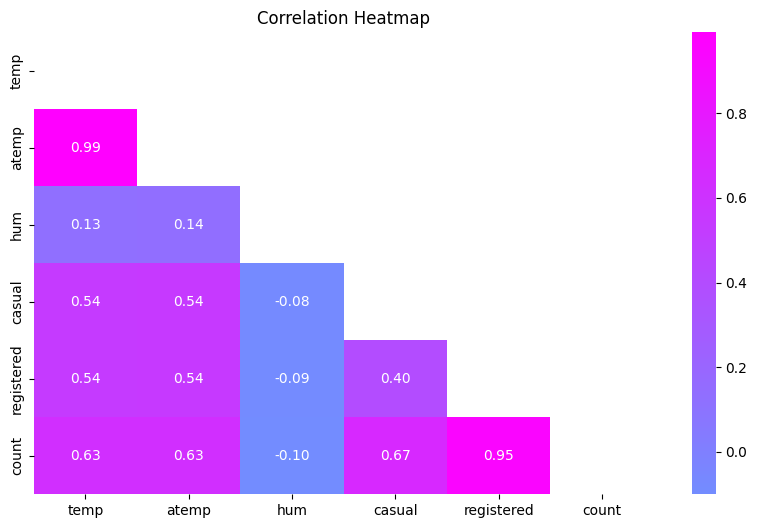

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = daybike_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="cool",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
#kesimpulan: atemp dan temp berkorelasi karena nilainya mendekati 1
#count berkorelasi kuat dengan registered

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Scatter plot untuk 'temp' vs 'count', 'atemp' vs 'count', 'hum' vs 'count'


Text(0.5, 1.0, 'Humidity vs Count')

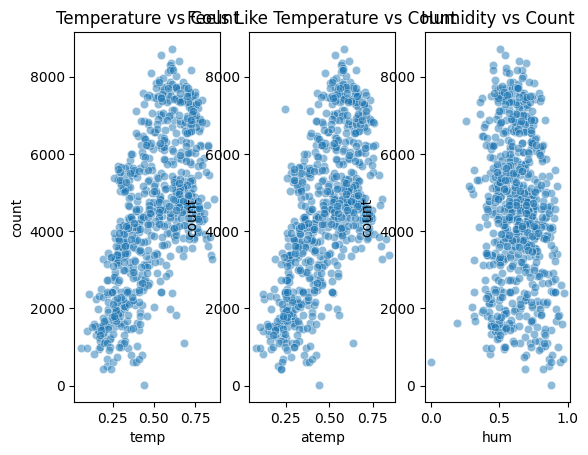

In [ ]:
#Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='count',
    data=daybike_df,
    alpha=0.5
)
plt.title('Temperature vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='count',
    data=daybike_df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Count')
# Scatter plot untuk 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='hum',
    y='count',
    data=daybike_df,
    alpha=0.5
)
plt.title('Humidity vs Count')

### Pertanyaan 2:

plot untuk weekday dan weekend

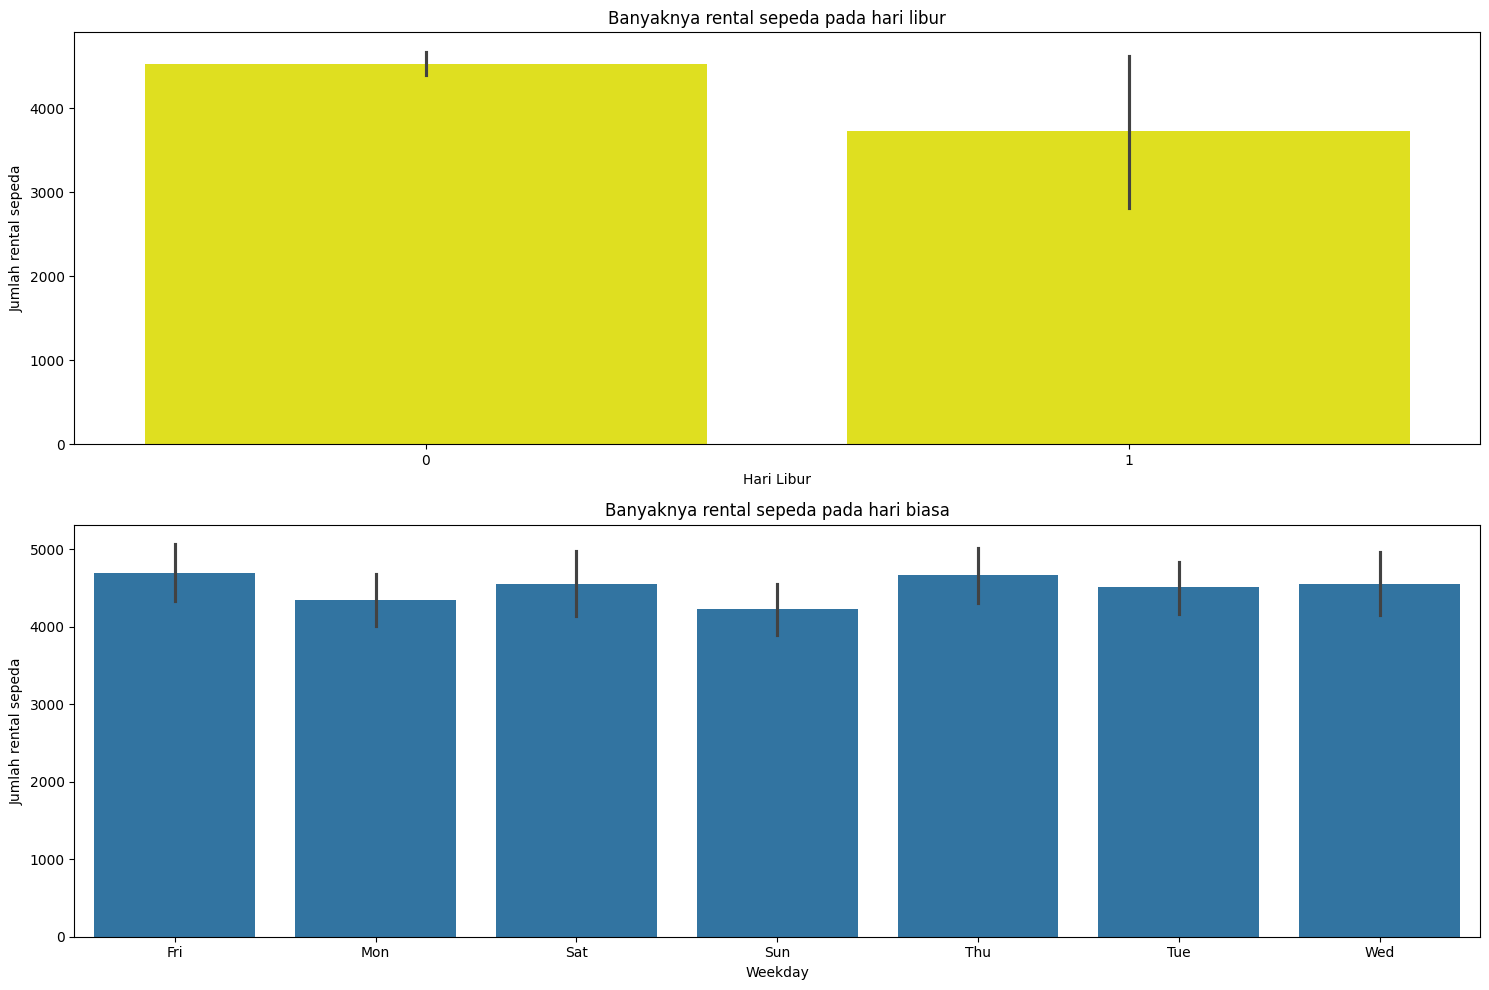

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
#berdasarkan hari libur
sns.barplot(
  x='holiday',
  y='count',
  data=daybike_df,
  ax=axes[0],
  color='yellow')
axes[0].set_title('Banyaknya rental sepeda pada hari libur')
axes[0].set_xlabel('Hari Libur')
axes[0].set_ylabel('Jumlah rental sepeda')

#berdasarkan hari biasa
sns.barplot(
  x='weekday',
  y='count',
  data=daybike_df,
  ax=axes[1])
axes[1].set_title('Banyaknya rental sepeda pada hari biasa')
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Jumlah rental sepeda')

plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1: Hubungan antara temp vs count dan atemp vs count berkorelasi positif,di mana artinya terdapat banyak pengguna yang menyewa sepeda pada saat cuaca mengalami kondisi temp atau atemp (cuaca memengaruhi banyaknya sepeda dirental) sedangkan hum vs count sedikit mengalami korelasi negatif, di mana artinya tidak terdapat banyak pengguna yang melakukan rental sepeda

- Conclution pertanyaan 2: 1. Jumlah sewa sepeda lebih banyak pada biasa pada hari jumat, sedangkan pada hari minggu tidak banyak pengguna yang melakukakn rental sepeda

In [ ]:
daybike_df.to_csv("all_dataday.csv", index=False)

In [ ]:
hourbike_df.to_csv("all_datahour.csv", index=False)

Pengembangan Dashboard

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
%%writefile dashboard.py

Writing dashboard.py


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.83.69.68


In [ ]:
! streamlit run dashboard.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.83.69.68:8501

npx: installed 22 in 5.589s
your url is: https://shy-dryers-remain.loca.lt
